In [1]:

library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(AnnotationDbi)
library(BSgenome.Mmusculus.UCSC.mm10)


Loading required package: GenomicFeatures

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading required package: GenomicRanges

Loading required package: Annota

In [2]:

library(Seurat)
library(EnhancedVolcano)

Attaching SeuratObject

Loading required package: ggplot2

Loading required package: ggrepel



In [5]:
library(MotifDb)

See system.file("LICENSE", package="MotifDb") for use restrictions.



In [3]:
#Import data
load("data/morris-niu-Mesenchyme.Rdata")
pbmc

An object of class Seurat 
24549 features across 14231 samples within 1 assay 
Active assay: RNA (24549 features, 981 variable features)
 2 dimensional reductions calculated: pca, umap

In [6]:
#Transcription factors
allTF = values (MotifDb)$geneSymbol

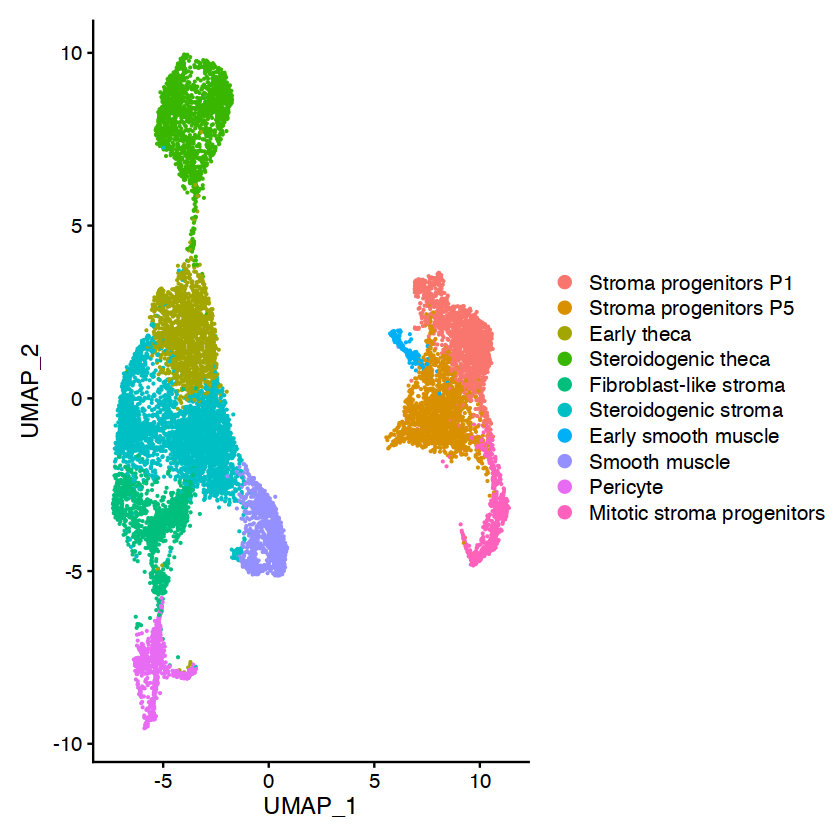

In [7]:
DimPlot(pbmc, reduction = "umap")

<h1>DEG - Stroma progenitors P5 vs P1</h1>

Identify promoters which support such expression patterns. Promoter regions were defined as encompassing a 3 kb region (2.5 kb upstream and 0.5 kb downstream of the TSS), relative to 5′ TSSs of all transcripts annotated

In [8]:
clusterP5.markers <- FindMarkers(pbmc, ident.1 = "Stroma progenitors P5", 
                                 ident.2 ="Stroma progenitors P1", min.pct = 0.40)
clusterP5.markers$cluster = "P5"


In [10]:
clusterP5.markers$dir <- ifelse(clusterP5.markers$avg_log2FC > 0,"up","down" )

In [11]:
clusterP5.markers$gene <- row.names( clusterP5.markers)
dim(clusterP5.markers)
head(clusterP5.markers)

[1] 41  8

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,dir,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
H19,1.265503e-233,-0.6515780,0.593,0.936,3.106683e-229,P5,down,H19
Dlk1,2.016952e-149,-0.4980116,0.766,0.944,4.951416e-145,P5,down,Dlk1
Cox7a2l,2.765188e-133,-0.2808167,0.875,0.967,6.788260e-129,P5,down,Cox7a2l
Meg3,9.836509e-132,-0.3025115,0.975,0.996,2.414765e-127,P5,down,Meg3
Hbb-bt,1.177453e-125,-0.3450935,0.719,0.902,2.890529e-121,P5,down,Hbb-bt
Gas1,8.630197e-123,-0.3780728,0.695,0.906,2.118627e-118,P5,down,Gas1


Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


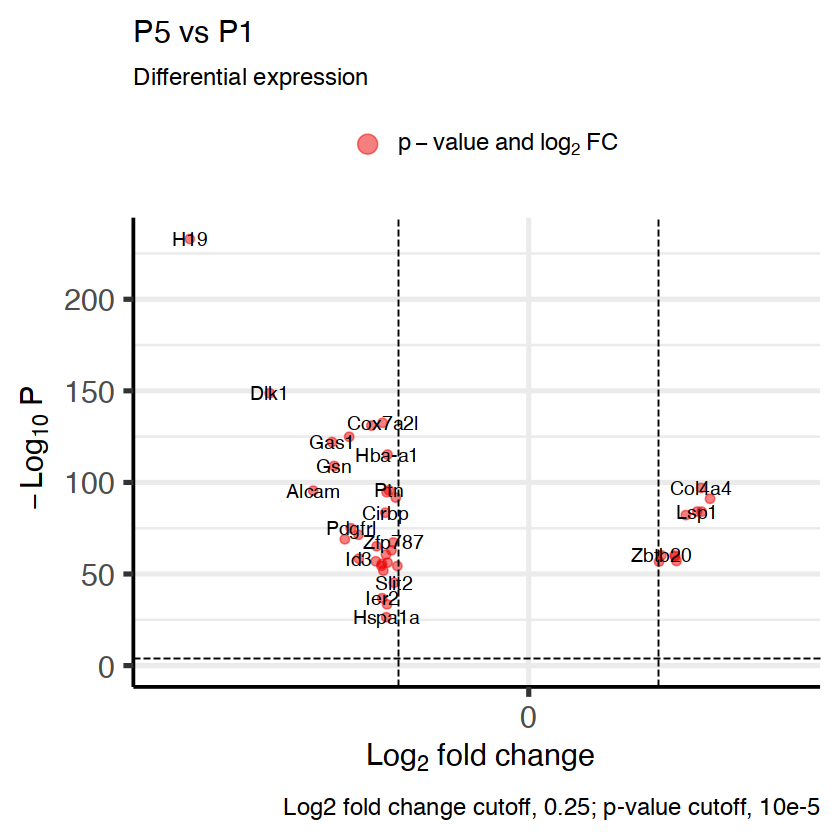

In [12]:
p1<- EnhancedVolcano(clusterP5.markers,
                lab = row.names( clusterP5.markers),
                x = 'avg_log2FC',
                y = 'p_val',
                ylim = 0,
                title = 'P5 vs P1',
                pCutoff = 10e-5,
                FCcutoff = 0.25,
                pointSize = 2.0,
                labSize = 4.0,
                caption = "Log2 fold change cutoff, 0.25; p-value cutoff, 10e-5",
                subtitle = "Differential expression")
p1 +
    ggplot2::coord_cartesian(xlim=c(-0.7, 0.5)) +
    ggplot2::scale_x_continuous(
      breaks=seq(-2,2, 1))

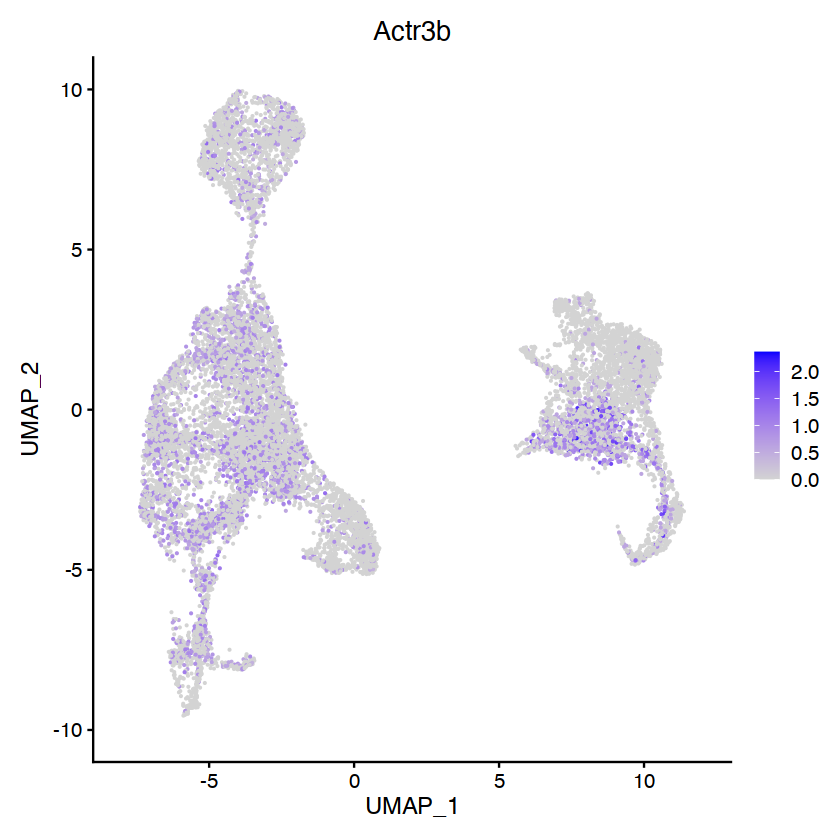

In [13]:
FeaturePlot(pbmc, features = "Actr3b")

<h2>Creat a list of genes based on the cutoff<h2>

In [14]:

clusterP5.DEG_CUT <-clusterP5.markers[order(clusterP5.markers$p_val, -clusterP5.markers$avg_log2FC),]

clusterP5.DEG_CUT <- clusterP5.DEG_CUT[clusterP5.DEG_CUT$avg_log2FC > 0.25 | 
                                       clusterP5.DEG_CUT$avg_log2FC < -0.25,]
clusterP5.DEG_CUT <- clusterP5.DEG_CUT[clusterP5.DEG_CUT$p_val < 10e-5 ,]
dim(clusterP5.DEG_CUT)
head(clusterP5.DEG_CUT)
write.csv(clusterP5.DEG_CUT,"data/deg_clusteP1_vs_P5_cut.csv", row.names = FALSE)
save(clusterP5.DEG_CUT, file = "data/deg_clusteP1_vs_P5_cut.Rdata")


[1] 41  8

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,dir,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
H19,1.265503e-233,-0.6515780,0.593,0.936,3.106683e-229,P5,down,H19
Dlk1,2.016952e-149,-0.4980116,0.766,0.944,4.951416e-145,P5,down,Dlk1
Cox7a2l,2.765188e-133,-0.2808167,0.875,0.967,6.788260e-129,P5,down,Cox7a2l
Meg3,9.836509e-132,-0.3025115,0.975,0.996,2.414765e-127,P5,down,Meg3
Hbb-bt,1.177453e-125,-0.3450935,0.719,0.902,2.890529e-121,P5,down,Hbb-bt
Gas1,8.630197e-123,-0.3780728,0.695,0.906,2.118627e-118,P5,down,Gas1


In [15]:

clusterP5.DEG.TF <- clusterP5.DEG_CUT[clusterP5.DEG_CUT$gene %in% allTF,]

#selectLab = rbind(clusterP5.DEG.TF[clusterP5.DEG.TF$dir == "up",][1:8,],
#                    clusterP5.DEG.TF[clusterP5.DEG.TF$dir == "down",][1:8,]
#                  )
clusterP5.DEG.TF

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,dir,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Foxl2,7.867274e-61,0.2804115,0.539,0.263,1.931337e-56,P5,up,Foxl2


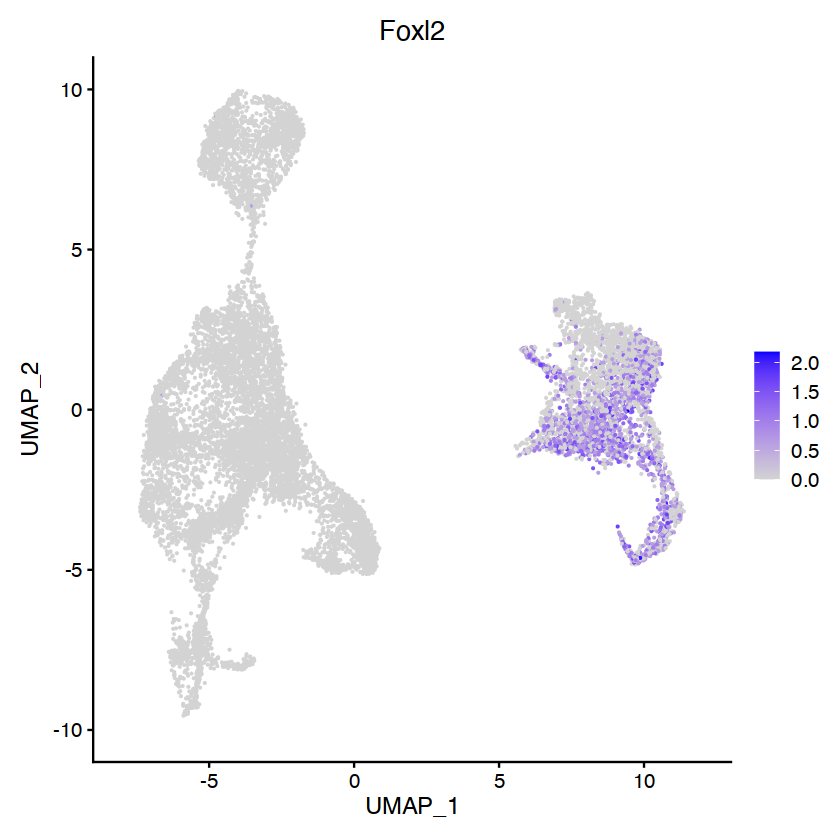

In [16]:
FeaturePlot(pbmc, features = "Foxl2")

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


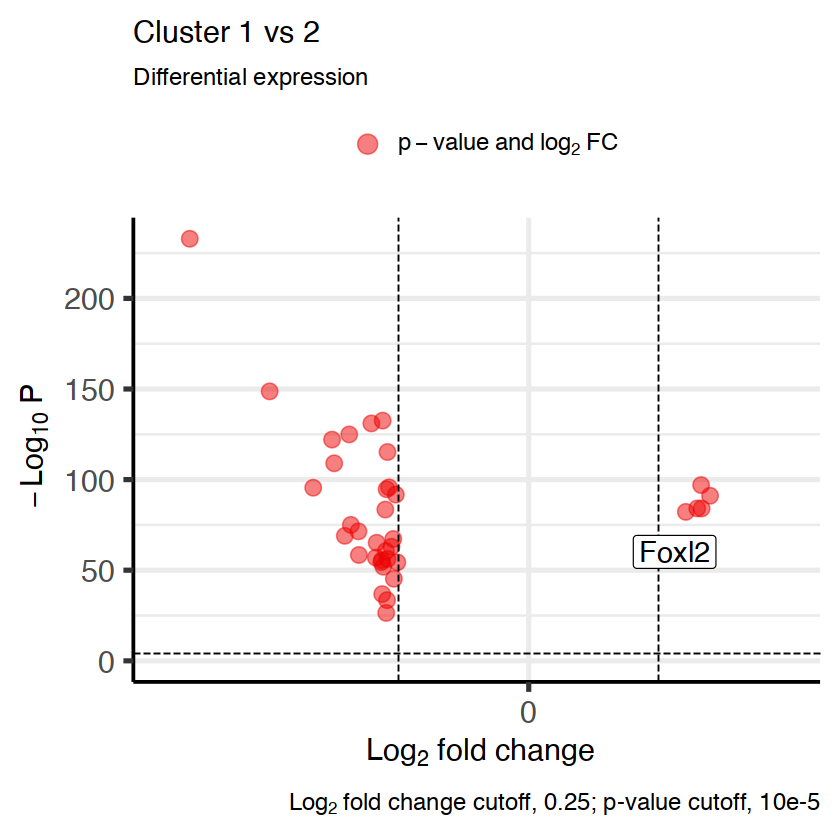

In [17]:

p1 <- EnhancedVolcano(clusterP5.markers,
                lab = row.names( clusterP5.markers),
                selectLab = clusterP5.DEG.TF$gene,
                boxedLabels = TRUE,
                x = 'avg_log2FC',
                y = 'p_val',
                ylim = 0,
                title = 'Cluster 1 vs 2',
                pCutoff = 10e-5,
                FCcutoff = 0.25,
                pointSize = 4.0,
                labSize = 6.0,
                labCol = 'black',
                labFace = 'bold',
                caption = bquote(~Log[2]~ "fold change cutoff, 0.25; p-value cutoff, 10e-5"),
                subtitle = "Differential expression")

p1 +
    ggplot2::coord_cartesian(xlim=c(-0.7, 0.5)) +
    ggplot2::scale_x_continuous(
      breaks=seq(-2,2, 1))

In [18]:
clusterP5.markersUP <- clusterP5.markers[clusterP5.markers$avg_log2FC >0,]
clusterP5.markersUP$dir = "up"
clusterP5.markersUP <-clusterP5.markersUP[order(clusterP5.markersUP$p_val,-clusterP5.markersUP$avg_log2FC),]
clusterP5.markersUP
dim(clusterP5.markersUP)
write.csv(clusterP5.markersUP,"data/deg_SP-P5-vs-P1_all_up.csv", row.names = FALSE)
save(clusterP5.markersUP, file = "data/deg_SP-P5-vs-P1_all_up.Rdata")


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,dir,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Col4a4,1.020874e-97,0.3313315,0.477,0.146,2.506144e-93,P5,up,Col4a4
AY036118,8.110499e-92,0.3484861,0.717,0.413,1.991047e-87,P5,up,AY036118
Lsp1,8.052254e-85,0.3238667,0.925,0.751,1.976748e-80,P5,up,Lsp1
Kcnk2,8.515339e-85,0.3323284,0.625,0.307,2.090431e-80,P5,up,Kcnk2
Cfh,6.493384e-83,0.3019830,0.742,0.480,1.594061e-78,P5,up,Cfh
Zbtb20,6.323274e-61,0.2549843,0.793,0.579,1.552301e-56,P5,up,Zbtb20
Foxl2,7.867274e-61,0.2804115,0.539,0.263,1.931337e-56,P5,up,Foxl2
Gm42418,2.867530e-60,0.2816283,0.885,0.737,7.039499e-56,P5,up,Gm42418
Chchd10,7.787840e-58,0.2840069,0.521,0.274,1.911837e-53,P5,up,Chchd10


[1] 10  8

In [19]:
clusterP5.markersDown <- clusterP5.markers[clusterP5.markers$avg_log2FC <0,]
clusterP5.markersDown$dir = "down"
clusterP5.markersDown <-clusterP5.markersDown[order(clusterP5.markersDown$p_val,-clusterP5.markersDown$avg_log2FC),]
head(clusterP5.markersDown)
dim(clusterP5.markersDown)
write.csv(clusterP5.markersDown,"data/deg_SP-P5-vs-P1_all_down.csv", row.names = FALSE)
save(clusterP5.markersDown, file = "data/deg_SP-P5-vs-P1_all_down.Rdata")


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,dir,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
H19,1.265503e-233,-0.6515780,0.593,0.936,3.106683e-229,P5,down,H19
Dlk1,2.016952e-149,-0.4980116,0.766,0.944,4.951416e-145,P5,down,Dlk1
Cox7a2l,2.765188e-133,-0.2808167,0.875,0.967,6.788260e-129,P5,down,Cox7a2l
Meg3,9.836509e-132,-0.3025115,0.975,0.996,2.414765e-127,P5,down,Meg3
Hbb-bt,1.177453e-125,-0.3450935,0.719,0.902,2.890529e-121,P5,down,Hbb-bt
Gas1,8.630197e-123,-0.3780728,0.695,0.906,2.118627e-118,P5,down,Gas1


[1] 31  8

In [32]:
pbmcTMP <- subset(pbmc, idents = c("Stroma progenitors P5","Stroma progenitors P1"))

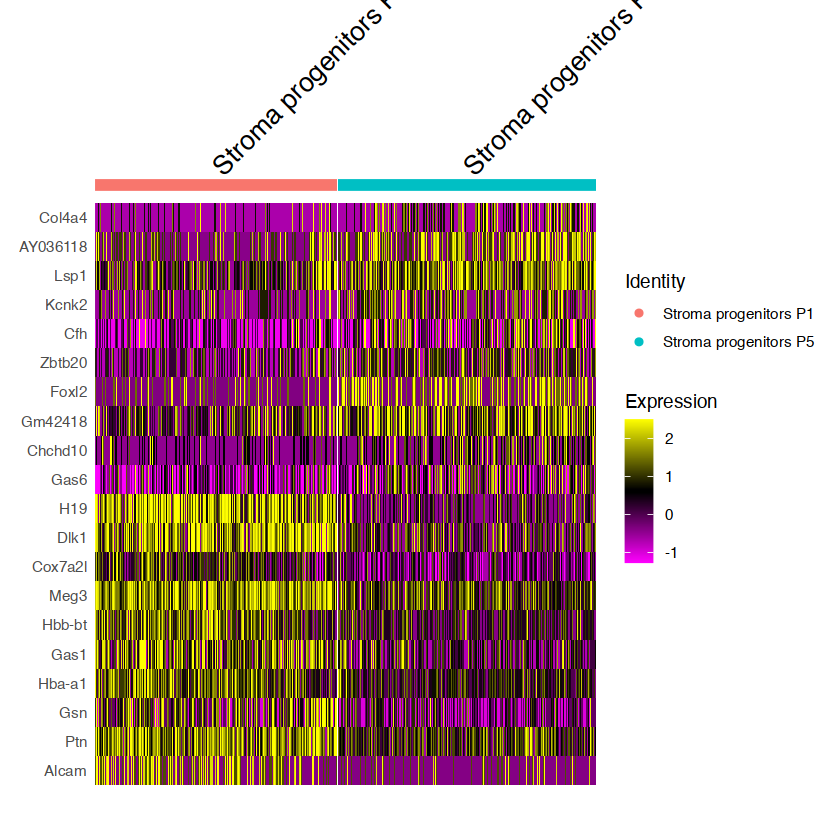

In [20]:

top10 = rbind( clusterP5.markersUP[1:10,], clusterP5.markersDown[1:10,])
DoHeatmap(pbmcTMP, features = top10$gene) 

In [21]:
library(org.Mm.eg.db)
library(AnnotationDbi)
library("clusterProfiler")



clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:AnnotationDbi’:

    select


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:stats’:

    filter




In [22]:
#BP MF CC
GO_results <- enrichGO(gene = row.names(clusterP5.markersUP) , 
                       OrgDb = "org.Mm.eg.db", keyType = "SYMBOL", ont = "BP")

In [23]:
as.data.frame(GO_results)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0030322,GO:0030322,stabilization of membrane potential,2/9,16/28943,1.029108e-05,0.004641279,0.001635741,Kcnk2/Chchd10,2
GO:0032835,GO:0032835,glomerulus development,2/9,66/28943,1.824756e-04,0.033961964,0.011969323,Col4a4/Cfh,2
GO:0071333,GO:0071333,cellular response to glucose stimulus,2/9,153/28943,9.754067e-04,0.033961964,0.011969323,Zbtb20/Gas6,2
GO:0071331,GO:0071331,cellular response to hexose stimulus,2/9,155/28943,1.000836e-03,0.033961964,0.011969323,Zbtb20/Gas6,2
GO:0071326,GO:0071326,cellular response to monosaccharide stimulus,2/9,156/28943,1.013670e-03,0.033961964,0.011969323,Zbtb20/Gas6,2
GO:0072006,GO:0072006,nephron development,2/9,161/28943,1.079036e-03,0.033961964,0.011969323,Col4a4/Cfh,2
GO:0071322,GO:0071322,cellular response to carbohydrate stimulus,2/9,164/28943,1.119209e-03,0.033961964,0.011969323,Zbtb20/Gas6,2
GO:0140053,GO:0140053,mitochondrial gene expression,2/9,164/28943,1.119209e-03,0.033961964,0.011969323,Cfh/Chchd10,2
GO:0032675,GO:0032675,regulation of interleukin-6 production,2/9,167/28943,1.160096e-03,0.033961964,0.011969323,Zbtb20/Gas6,2


In [24]:
#BP MF CC
GO_results <- enrichGO(gene = row.names(clusterP5.markersDown) , 
                       OrgDb = "org.Mm.eg.db", keyType = "SYMBOL", ont = "BP")
as.data.frame(GO_results)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0050680,GO:0050680,negative regulation of epithelial cell proliferation,6/31,190/28943,4.749307e-08,6.164601e-05,3.394505e-05,Dlk1/Gas1/Ptn/Tgfb2/Cdkn1c/Sfrp1,6
GO:0045926,GO:0045926,negative regulation of growth,6/31,261/28943,3.094013e-07,2.008015e-04,1.105703e-04,H19/Gas1/Cirbp/Tgfb2/Sfrp1/Slit2,6
GO:0071514,GO:0071514,genomic imprinting,3/31,19/28943,1.065555e-06,4.610301e-04,2.538638e-04,H19/Meg3/Cdkn1c,3
GO:0030308,GO:0030308,negative regulation of cell growth,5/31,200/28943,2.200109e-06,5.175940e-04,2.850104e-04,Gas1/Cirbp/Tgfb2/Sfrp1/Slit2,5
GO:0048771,GO:0048771,tissue remodeling,5/31,203/28943,2.366589e-06,5.175940e-04,2.850104e-04,Dlk1/Ptn/Eln/Tgfb2/Sfrp1,5
GO:0007517,GO:0007517,muscle organ development,6/31,371/28943,2.392576e-06,5.175940e-04,2.850104e-04,Meg3/Eln/Tgfb2/Lox/Chd2/Id3,6
GO:0050678,GO:0050678,regulation of epithelial cell proliferation,6/31,442/28943,6.531757e-06,1.139517e-03,6.274690e-04,Dlk1/Gas1/Ptn/Tgfb2/Cdkn1c/Sfrp1,6
GO:0007411,GO:0007411,axon guidance,5/31,259/28943,7.754992e-06,1.139517e-03,6.274690e-04,Gas1/Alcam/Tgfb2/Ncam1/Slit2,5
GO:0097485,GO:0097485,neuron projection guidance,5/31,260/28943,7.901120e-06,1.139517e-03,6.274690e-04,Gas1/Alcam/Tgfb2/Ncam1/Slit2,5


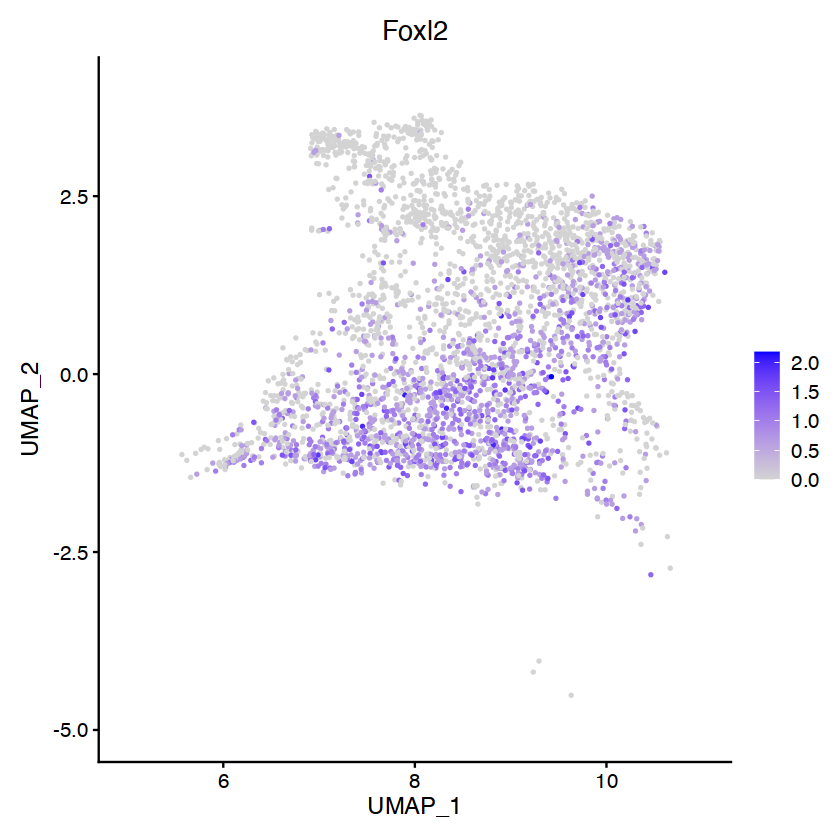

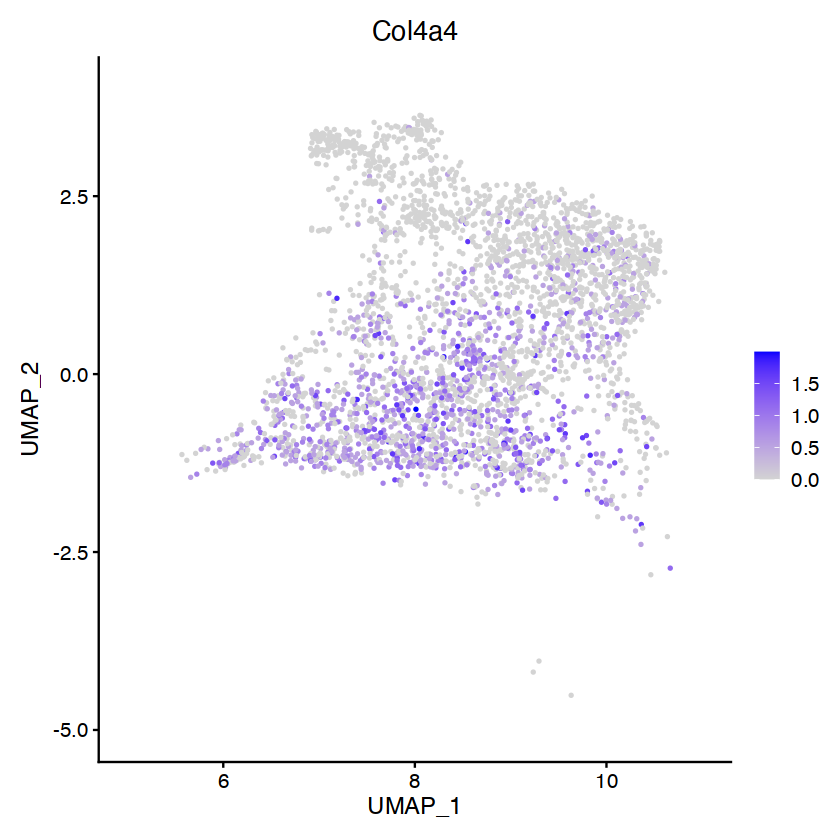

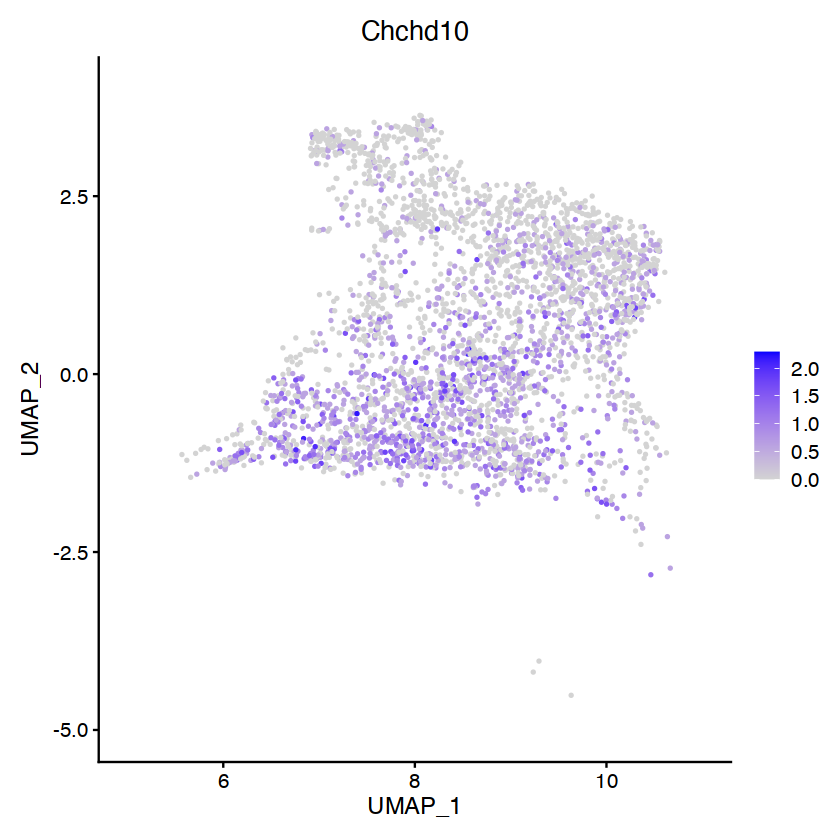

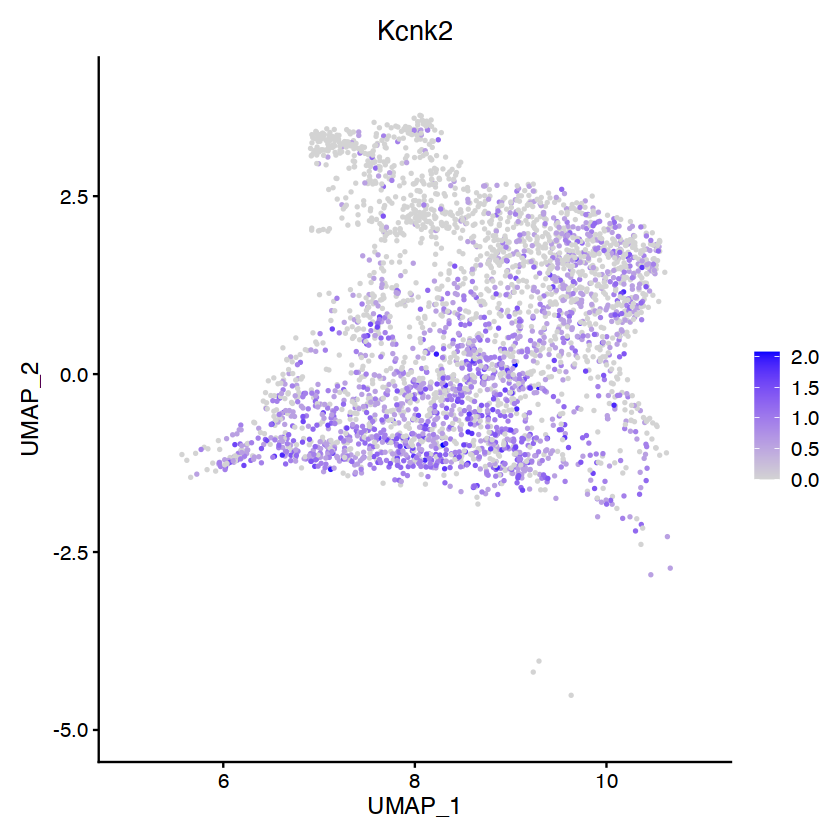

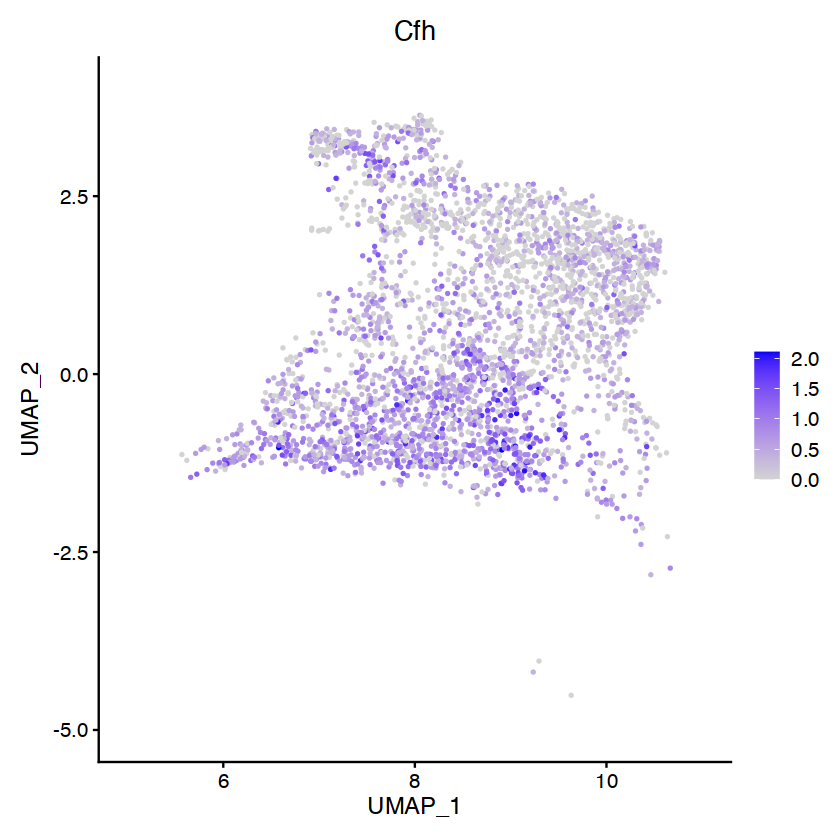

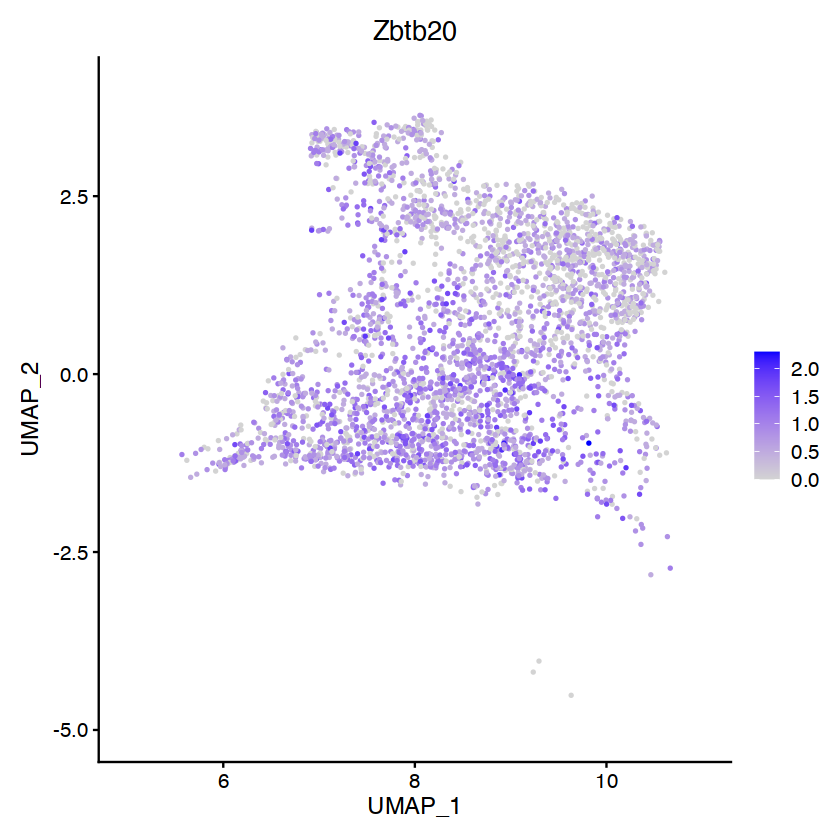

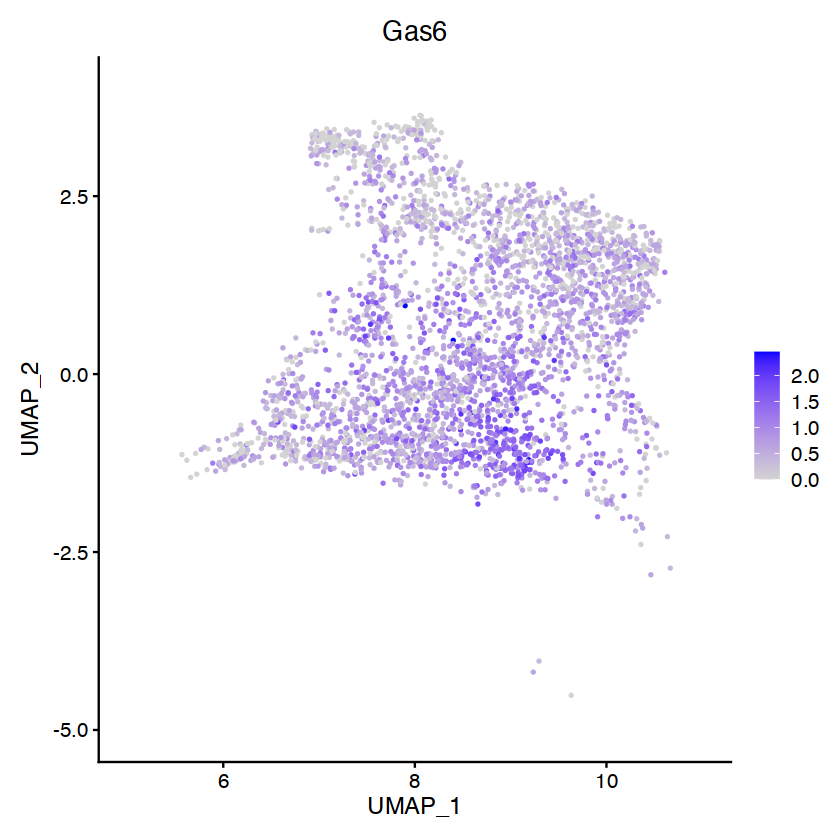

In [36]:
FeaturePlot(pbmcTMP, features = c("Foxl2"))
FeaturePlot(pbmcTMP, features = c("Col4a4"))
FeaturePlot(pbmcTMP, features = c("Chchd10"))
FeaturePlot(pbmcTMP, features = c("Kcnk2"))
FeaturePlot(pbmcTMP, features = c("Cfh"))
FeaturePlot(pbmcTMP, features = c("Zbtb20"))
FeaturePlot(pbmcTMP, features = c("Gas6"))





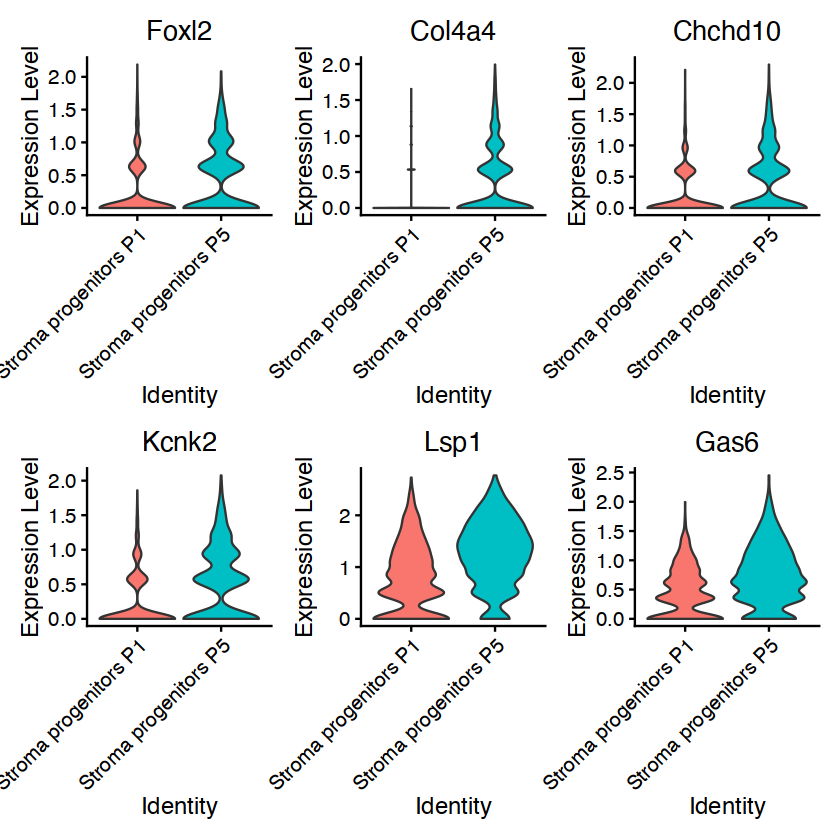

In [53]:
# "Col4a4","Chchd10","Kcnk2","Cfh","Zbtb20","Gas6"
VlnPlot(pbmcTMP, features = c("Foxl2","Col4a4","Chchd10","Kcnk2","Lsp1","Gas6"),pt.size = 0,)


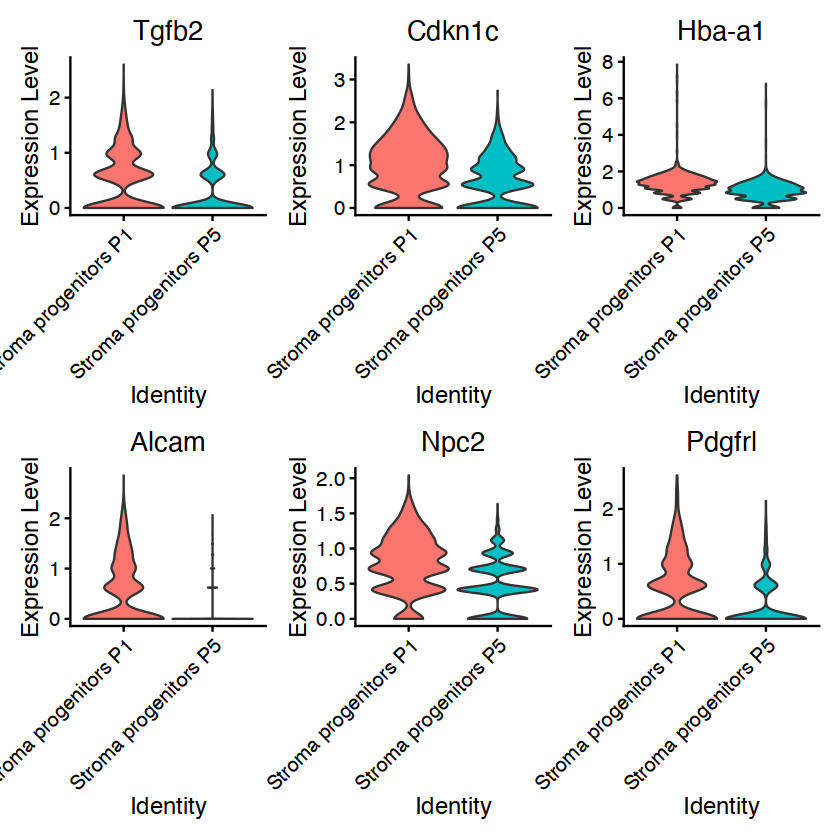

In [56]:
# "Col4a4","Chchd10","Kcnk2","Cfh","Zbtb20","Gas6"
VlnPlot(pbmcTMP, features = c("Tgfb2","Cdkn1c","Hba-a1","Alcam","Npc2","Pdgfrl"),pt.size = 0,)


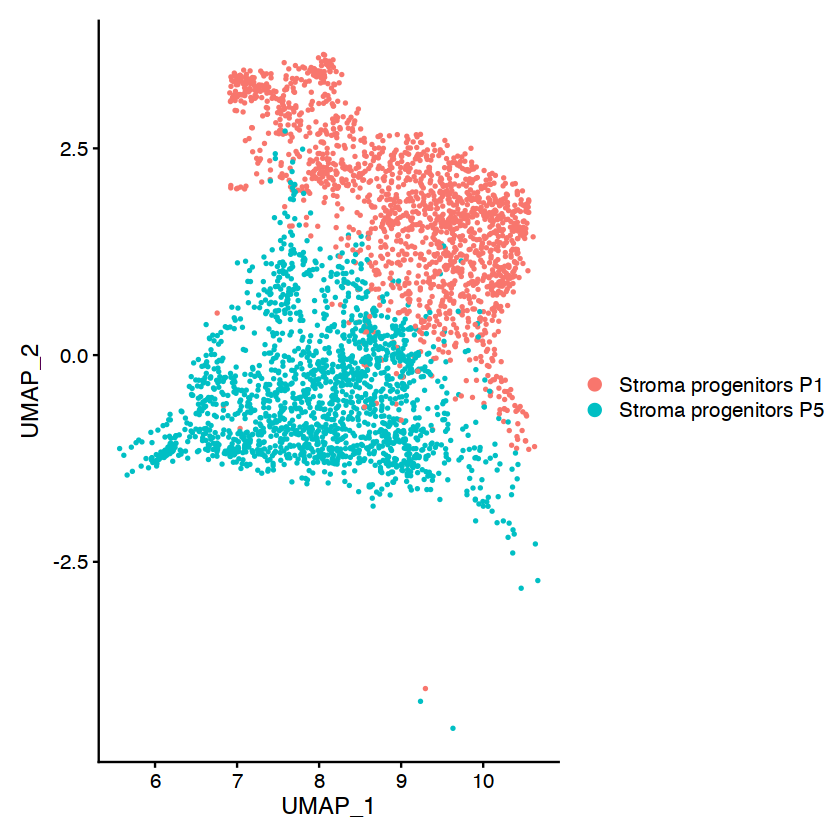

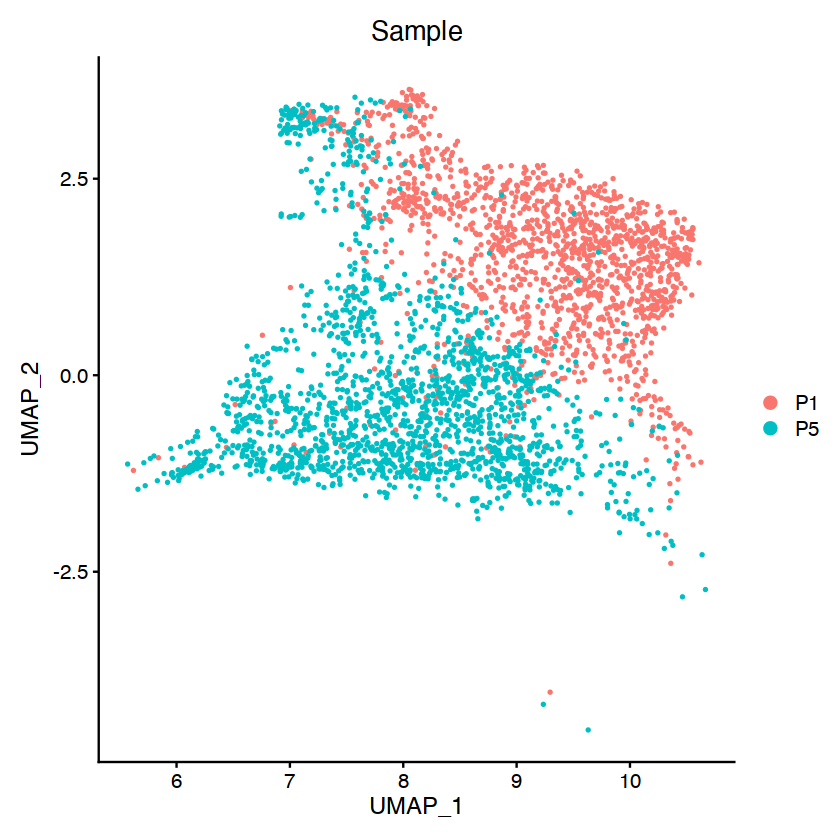

In [34]:
DimPlot(pbmcTMP,reduction = "umap")
DimPlot(pbmcTMP,reduction = "umap", group.by = "Sample")